In [ ]:
import random

suit_list = ["S", "H", "D", "C"]
suit_dict = {suit_list[i]: i for i in range(len(suit_list))}
num_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1]
num_dict = {num_list[i]: i for i in range(len(num_list))}

order_list = ["n", "e", "s", "w"]


class Card:
    def __init__(self, num, suit):
        self.num = num
        self.suit = suit

    def __str__(self):
        return f"{self.suit}{self.num}"

    def __repr__(self):
        return f"{self.suit}{self.num}"


class Player:
    def __init__(self, card_list, position):
        self.card_list = sort_by_num(sort_by_suit(card_list))
        self.played_card_list = []
        self.position = position

    def play(self, pre_card=None):
        card_return = None
        largest_card = pre_card
        compare = False
        if pre_card is not None:
            for card in self.card_list:
                if card.suit == pre_card.suit and num_dict[card.num] > num_dict[pre_card.num]:
                    card_return = card
                    largest_card = card
                    compare = True
                    break
        else:
            compare = True
            largest_card = self.card_list[0]
        if card_return is None:
            card_return = self.card_list[0]
        self.card_list.remove(card_return)
        self.played_card_list.append(card_return)
        return card_return, largest_card, compare

    def __str__(self):
        return f"Position: {self.position} \nCard List: {self.card_list} \nPlayed Card: {self.played_card_list}"

    def __repr__(self):
        return f"Position: {self.position} \nCard List: {self.card_list} \nPlayed Card: {self.played_card_list}"


def sort_by_suit(card_list):
    card_list.sort(key=lambda card: suit_dict[card.suit], reverse=True)
    return card_list


def sort_by_num(card_list):
    card_list.sort(key=lambda x: num_dict[x.num])
    return card_list


def generate_random_poker_list():
    p_list = []
    for num in range(1, 14):
        p_list.append(Card(num, "S"))
        p_list.append(Card(num, "H"))
        p_list.append(Card(num, "D"))
        p_list.append(Card(num, "C"))
    random.shuffle(p_list)
    return p_list


def deal_card(p_list):
    n = []
    w = []
    s = []
    e = []
    for i in range(0, 52, 4):
        n.append(p_list[i])
        w.append(p_list[i + 1])
        s.append(p_list[i + 2])
        e.append(p_list[i + 3])
    return Player(n, "N"), Player(w, "W"), Player(s, "S"), Player(e, "E")


In [ ]:
# import csv
# f = open("result.csv", "w")

# # create the csv writer
# writer = csv.writer(f)
score_list = []
count_list = []

for score in range(-1, 12):
    total_score = 0
    for i in range(1, 13 - score):
        total_score += i * 4
    for test in range(0, 10000):
        pn, pw, ps, pe = deal_card(generate_random_poker_list())
        
        ns_score = 0
        we_score = 0
        
        for i in range(0, 13):
            score_get = num_dict[pn.card_list[i].num] - score
            if score_get > 0:
                ns_score += score_get
            score_get = num_dict[ps.card_list[i].num] - score
            if score_get > 0:
                ns_score += score_get
            score_get = num_dict[pw.card_list[i].num] - score
            if score_get > 0:
                we_score += score_get
            score_get = num_dict[pe.card_list[i].num] - score
            if score_get > 0:
                we_score += score_get
        
        order_dict = {"n": pn, "e": pe, "s": ps, "w": pw}
        winner_list = []
        start = 0
        for i in range (0, 13):
            list_play = []
            compare_list = []
            pre_card = None
            largest = None
            for j in range(0, 4):
                pre_card, largest, compare = order_dict[order_list[start]].play(largest)
                compare_list.append(compare)
                list_play.append(f"{order_dict[order_list[start]].position}: {pre_card}")
                start += 1
                if start == 4:
                    start = 0
            next_start = 0
            for j in range(0, 4):
                if compare_list[j] == True:
                    next_start = start + j
            if next_start > 3:
                start = next_start - 4
            else:
                start = next_start
        #     print("winner: ", order_list[start], list_play, compare_list)
            winner_list.append(start)

        odd_count = 0
        even_count = 0

        for win in winner_list:
            if win % 2 == 0:
                even_count += 1
            else:
                odd_count += 1

#         print(f"EvenScore: {ns_score}, Even(N, S): {even_count}, OddScore: {we_score}, Odd(E, W): {odd_count}")
        # print(f"Result: {(ns_score - we_score) / total_score}, {even_count - odd_count}")
        # writer.writerow([(ns_score - we_score) / total_score, even_count - odd_count])
        score_list.append((ns_score - we_score) / total_score)
        count_list.append(even_count - odd_count)

# f.close()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(count_list, score_list,  marker="*")
plt.xlabel("Stacks Differences: (ns - we)")
plt.ylabel("Score Percent Differences: (ns - we)")
plt.xticks(np.arange(-13, 14, 2))

plt.show()

In [ ]:
from scipy import stats

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
count_list_with_const = sm.add_constant(count_list)
results = sm.OLS(score_list, count_list_with_const).fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                 4.545e+04
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:02:09   Log-Likelihood:                 28467.
No. Observations:              130000   AIC:                        -5.693e+04
Df Residuals:                  129998   BIC:                        -5.691e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0070      0.001     12.982      0.0

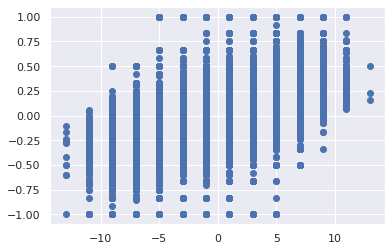

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

plt.scatter(count_list, score_list)

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(count_list, score_list)
print(slope, intercept, r_value, p_value, std_err)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

plt.scatter(count_list, score_list)
x = np.linspace(-13, 13, 1000)
y = slope * x + intercept
plt.plot(x, y, '-r', label="Linear Regression Line")
plt.legend(loc='upper left')
plt.xlabel("Stacks Differences: (ns - we)")
plt.ylabel("Score Percent Differences: (ns - we)")
plt.grid()
plt.show()

In [ ]:
import seaborn as sns
plt.xlabel("Score Percent Differences: (ns - we)")
sns.distplot(score_list)

In [ ]:
print(np.mean(score_list))

In [ ]:
print(np.std(score_list))

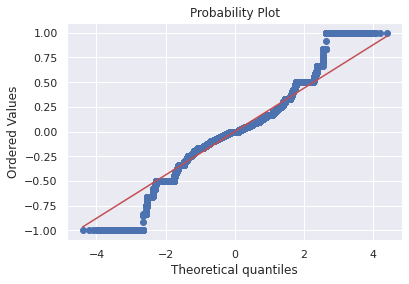

In [ ]:
import numpy as np
import pylab
import scipy.stats as stats

stats.probplot(score_list, dist="norm", plot=pylab)
pylab.show()